# 프로젝트: Movie Recommendation using GRU 
* `Dataset`: Movielens 영화

# 루브릭 
1. Movielens 데이터셋을 `user based recommendation 관점`(=> Collaborative filtering)으로 전처리하는 과정이 체계적으로 진행되었다.
    - 데이터셋의 면밀한 분석을 토대로 ~세션~(사용자?) 단위 정의 과정(길이분석, 시간분석)을 합리적으로 수행한 과정이 기술되었다.(V)
2. RNN 기반의 예측 모델이 정상적으로 구성되어 안정적으로 훈련이 진행되었다.
    - 적절한 epoch만큼의 학습이 진행되는 과정에서 train loss가 안정적으로 감소하고, validation 단계에서의 `Recall, MRR`이 개선되는 것이 확인된다. (V)
3. `세션 정의, 모델구조, 하이퍼파라미터 등을 변경`해서 실험하여 Recall, MRR 등의 `변화추이`를 관찰하였다.
    - 3가지 이상의 변화를 시도하고 그 실험결과를 체계적으로 분석하였다. (V)

# 회고
    이번 프로젝트 같은 경우 어떤 데이터를 보느냐에 대해 이해가 안 된 부분이 있었다. 세션 기반의 추천 시스템인데에 비해, 영화 리뷰 데이터셋 같은 경우에는 세션 데이터와는 연관성이 없어 보였기 때문이다. 세션은 약간 머무른 데이터라는 느낌이 있는데 이러한 부분에서 의문점이 해결되지 않아 논문을 뒤늦게 보고 회고를 정리했다. `파파고를 열심히 돌렸고, 의미와 흐름에 맞게 해석을 다시 했다. 오랜만에 영어 공부했다. ㅎㅎㅎ 토익.. 다시 따야하나..!`

## 이슈사항 
1. 영화리뷰 데이터이기 때문에, 리뷰 작성 시간이 다음 볼 영화를 예측할 수 있는가?하는 의문이 들었습니다.
    Prediction using Movielens를 검색해보면, 예측대상이 다음에 볼 영화 보다는 해당 영화에 대한 rating을 몇점으로 할지 예측하는 자료가 많았습니다.
    데이터셋 특징을 생각했을때, 다음볼 영화보다 해당 영화에 대한 Rating을 예측하는게 맞지 않을까 생각이 드는데.. 이렇게 되면, Session based가 아니니까.. ~데이터셋이 커머스 데이터인게 좋지 않을까..?!~
    검색키워드: prediction using rnn about movie lens, prediction using movie lens

2. SessionId를 UserId로 대체해서 생각해야하는 부분이 SBR로서 적절한가?.. 라는 고민도 들었고, 데이터 전처리 과정에서 매우 헷갈렸습니다. 

## 이번 프로젝트에서 집중해서 본 부분
1. Session Recommendation System 논문에서 요약, 서론, ~결론~ 정리 (▲)
2. 이전에 진행한 ALS 모델을 기반으로 작성한 Recommendation System과 차이점 (V)
3. Recall, MRR (V)

## Collaborative Filtering? Contents-based Filtering?
    협업 필터링(Collaborative Filtering에서는 아이템과 사용자 간의 행동 또는 관계에 주목합니다. 반면에 콘텐츠 기반 필터링(Contents-based Filtering)은 아이템 자체의 속성에 주목합니다. 따라서 사용자와 아이템 간의 관련성에 대해서는 집중해서 사용자의 특성에 따른 개인화된 추천을 제공할 때는 Collaborative Filtering을 사용합니다. 이번 영화 추천 같은 경우 `session data인 click-stream(time-stream)`에 집중할거기 때문에 협업 필터링에 해당합니다. 

### Collaborative Filtering의 취약점
> Exploration 8을 참고했습니다. 
1. 시스템이 충분한 정보를 모으지 못 했을 때, 사용자나 아이템에 대한 추론을 할 수 없는 상태인 Cold start
2. 계산량이 너무 많아서 추천의 효율이 떨어지는 상황 
3. long tail의 꼬리 부분, 즉 사용자의 관심이 저조한 항목의 정보가 부족하여 추천에서 배제되는 상황 
    
**`=> 위에 세가지의 경우가 Movielens에도 해당하는지 체크하고, 이는 Dataset을 통해 해결되어야하는 부분이기 때문에 제거해서 협업 필터링의 추천 성능을 보장할 수 있도록 하겠습니다.`**

## Session Based Recommendation (GRU4REC)
> 해당 자료는 [SESSION-BASED RECOMMENDATIONS WITH RECURRENT NEURAL NETWORKS(ICLR 2016)](https://arxiv.org/pdf/1511.06939.pdf) 논문에서 제안된 추천 시스템 입니다. 해당 논문의 요약, Instroduction, Conclusion(시간 관계상 .. 본문은 블로그 내용을 기반으로...)과 논문과 관련된 [정리](https://lsjsj92.tistory.com/590)자료를 참고하여 SBR에 대해 공부했습니다. 

`아래의 요약과 서론은 열심히.. 원문을 공부한 자료를 바탕으로 작성했습니다.`
### Abstract 
> We apply recurrent neural networks (RNN) on a new domain, namely recommender systems. Real-life recommender systems often face the problem of having
to base recommendations `only on short session-based data (e.g. a small sportsware
website)` instead of `long user histories (as in the case of Netflix)`. In this situation
the frequently praised matrix factorization approaches are not accurate. This problem is usually overcome in practice `by resorting to item-to-item recommendations,
i.e. recommending similar items`. <br>
We argue that `by modeling the whole session,
more accurate` recommendations can be provided. We therefore propose an `RNNbased approach for session-based recommendations`. Our approach also `considers
practical aspects of the task and introduces several modifications to classic RNNs`
such as a `ranking loss function` that make it more viable for this specific problem.
Experimental results on two data-sets show marked improvements over widely
used approaches.

    논문에서는 새로운 도메인, 즉 추천 시스템에 반복 신경망(RNN)을 적용합니다. 실생활에서 추천 시스템들은 종종 다음과 같은 문제에 직면합니다. `넷플릭스처럼 오랜 기간에 걸쳐 수집된 사용자 히스토리(서버 기록)`보다는, `짧은 세션 기반 데이터(예: 소형 스포츠웨어 웹사이트)`에만 한정적으로 적용 가능하다는 점입니다. 

    그리고 이러한 데이터셋에서 자주 사용되는 Matrix fatorization 접근법은 결과가 정확하지 않습니다. 이 문제는 대개 `items 대 items 추천 시스템 방식`을 활용해 해결합니다. 예를 들어 `유사한 item을 추천`합니다. <br>

    이 논문에서는 `전체 세션을 모델링하는 것이
    보다 정확한 추천 시스템을 제공할 수 있다`고 말합니다. 따라서 논문에서 `RNN based approach for session-based recommendation`을 제안합니다. 또한, 고전적인 RNN에 대해 해당 과제와 관련해서 이전에 적용됐던 측면들과 몇가지 수정사항을  적용합니다.  예를 들어서 좀 더 성공적으로 추천 시스템을 제공할 수 있도록 `ranking loss function`을 적용합니다. 논문 실험은 두 데이터 세트에 대한 결과 및 개선사항을 보여줍니다. 

* Session-based data: 서버에 머무른 시간, 사용자의 정보 이용 시간
    - e.g. 쇼핑몰에서의 Session data: 브라우저가 종료되기 전까지 유저의 행동을 담은 데이터 

### Instroduction 
    Session-based recommendation(이하,  SBR)은 머신러닝과 추천시스템 쪽에서는 비교적 잘 알려져있지는 않습니다. 많은 e-commerce(전자상거래) 추천 시스템(특히, 소매업자)과 뉴스나 미디어사이트에서는 user ID나 user가 얼마나 오래 해당 사이트를 방문하는지에 대한 정보를 추적할 수 없습니다. 사용자 cookies와 browser fingerprinting는 사용자의 동의 하에 어느 정도 수준에서는 제공이 가능하지만, 이러한 정보 수집은 privacy  문제에서 완전하게는 자유롭지 못 합니다. cookies와 fingerprinting을 추적 가능해도 작은 규모의 전자상거래 사이트에서는 대부분의 사용자(user)는 한 두번 정도의 세션(사이트에 머문 시간, history와 비슷한 개념)만 남깁니다. 그리고 classified sites(홍보 플랫폼과 비슷)와 같은 특정 도메인에서는 사용자들의 행동은 종종 세션(session) 기반 특성들을 보입니다. 이러한 특성들 때문에 같은 사용자의 이어져 나타나는 세션들은 독립적으로 다뤄져야 합니다. 결과적으로 전자상거래를 위해 효율적으로 사용되는 대부분의 SBR system들은 user 정보를 이용하지 않는 상대적으로 간단한 방법들(예를 들어, item 대 item 유사도, co-occurrence, trainsition probabilites)에 의존합니다. 이와 같은 방법들은 효과적이고, 마지막 클릭이나, 과거 클릭 정보를 배제한 사용자의 선택만 고려합니다. 

    추천 시스템에서 가장 자주 쓰이는 모델들에는 factor models와 neighborhood models가 있습니다. (중략 -  factor models와 neighborhood models에 대한 각각의 설명)

    최근 몇년간 DNN은 이미지와 음성 인식과 같은 많은 과제들을 성공적으로 수행해냈습니다. Sequential data modeling은 이러한 data를 활용하는 RNNs과 함께 최근 매우 큰 관심을 받고 있습니다.

    `아래 내용에서 왜 논문에서 RNNs를 Session-based Recommendation에 적용했는지 설명하고 있다.`
    RNNs은 앞서 언급한 Sequential data와 관련된 도메인들에서 적용되고좋은 성능을 보이는 반면, 추천 시스템 분야에는 적용되지 않았습니다. 그래서 논문에서는 세션이 가지는 sparse하고, sequential하다는 특징을 기반으로 RNNs를 SDR에 적용합니다.  

    이 때 손실함수는 새로운 ranking loss function을 적용합니다. SDR에 사용되는 RNN을 고려해보면, 사용자가 웹사이트를 이용할 때 클릭한 첫 아이템을 RNN의 initial input이라고 생각해봅시다. 그럼, 이후 이어지는사용자의  각각 클릭들은 이전 클릭에 의존한 결과로 볼 수 있습니다. 즉, RNN 모델로 들어가는 어떠한 Sequential한 input은 전자상거래와 같은 웹사이트에서 click-stream data인 것입니다. 하지만 stream에 대한 data이기 때문에 매우 방대하고, 확장성을 지닙니다. 따라서 대부분의 추천 시스템은 사용자가 관심을 가질 수 있는 최상위 조건에서 모델링하기 때문에 Ranking loss function을 사용해 RNN을 훈련시킵니다. 

* ranking loss function: 해당 [링크](https://gombru.github.io/2019/04/03/ranking_loss/)에서 자세히 다뤄지고 이를 Triplet loss라고 고려해보는 것을 추천합니다. pairwise ranking loss도 있지만 triplet이 성능이 더 좋기도 하고, 이전 프로젝트에서 배운 개념이기 때문에 ALS 모델을 활용한 영화 추천 시스템 프로젝트를 참고하면 됩니다. 

###  Session Based Recommendation의 취약점
> 이 부분은 [해당 블로그](https://soobarkbar.tistory.com/184)의 내용을 발췌했습니다.
1. 한 세션에서 충분한 사용자의 행동 기록이 없으면 user representation하기 어려움 
2. 세션내 다른 여러 item들, 즉 Contexts들간의 transition을 무시하기 때문에 멀리 떨어진 item들 사이의 복잡한 transition은 종종 간과됨 
`=> 이러한 취약점들을 극복하기 위해 SR-GNN을 사용해서 item들의 transition을 파악하려고 시도합니다.`

## 평가지표 
> [해당 블로그](https://zzaebok.github.io/recommender_system/metrics/rec_metrics/)에서 내용을 발췌했습니다.
### Recall@k
k개의 추천 중 실제로 사용자가 선호하는 아이템이 얼마나 존재하는지 측정하는 지표 

### MRR@k - Mean Reciprocal Rank
첫번째로 등장하는 relevant한 아이템이 우리의 추천상 몇번째에 위치하는지를 나타내는 지표입니다. 그러나 추천 상의 몇 개의 아이템이 나오든 첫 번째로 나오는 relevant 아이템만 신경쓴다는 단점이 있습니다.

## 추천시스템에서 Data Split
추천 시스템은 지금 잘 예측하는게 중요합니다. 
사용자들의 소비패턴은 너무 과거의 데이터로는 부정확할 수 있습니다. 
따라서 Session-based Recommendation 같은 경우 순서에 의미를 두기 떄문에 기간에 따라 셋을 나누기도 합니다. 
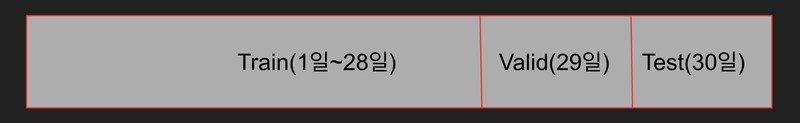

**하지만! 여기서 한번더 체크하고 넘어가야할 부분이 있습니다. 이번 프로젝트는 해당 논문을 그대로 구현하고 있지 않다는 점입니다! 데이터셋을 Session-based인 click-stream으로 볼 수 없지만, 여기서는 몇 개의 전제들을 가지고 진행하므로 해당 사항들을 미리 체크해보겠습니다.**

## 전제 
1. Movielens 데이터셋에서의 Time stamp는 초를 기반으로 어떠한 click-stream을 이미한다고 취급한다. 
2. Movielens 데이터셋에서는 사용자에 대한 나이 정보나, item에 해당하는 영화에 대한 정보를 알 수 없다고 생각한다. 실제로는 제공되고 있어서 Test해볼 떄 Prediction 결과가 명확한지 체크하는 용도로 사용할 수 있다. 
3. **Movielens 데이터셋에서는 User Id가 드러나있기 때문에 이를 Session으로 취급한다. 즉, SessionId를 UserId가 대체합니다.** 

## 적용사항
1. **click-stream이외에도 SBR의 취약점을 보완하기 위해 맥락이 영향을 줄 수 있는 Ratings값을 긍정적인 sequential data로만 구성할 수 있도록 하기 위해 특정값 이하를 배제한다.**(@혜미님 아이디어) 

## Step 0. 기본 세팅 

In [253]:
# 사용 라이브러리 import
# 데이터 전처리 및 분석용 라이브러리 
import datetime as dt
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 모델 학습과 관련된 라이브러리 
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# jupyter notebook output 관련 라이브러리 
from tqdm import tqdm # 실행 시간 
import warnings # 경고 메세지 
warnings.filterwarnings('ignore')

## Step 1. 데이터의 전처리
* 항목별 기본분석, user length, user time, cleaning 등의 작업
> 특히, 이 데이터셋에서는 Session이 아닌 UserID 단위로 데이터가 생성되어 있으므로, 이를 Session 단위로 어떻게 해석할지에 주의합니다. <br>
`노드 중에서 ...`

위와 같은 설명이 있는데 해당 데이터셋을 UserId 단위로 데이터가 생성이 되어 있는데, 이를 Session 단위로는 어떻게 확인해볼 수 있을지를 의미합니다. 

### Data Load

In [254]:
def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time']
    return data

In [ ]:
data_path = Path(os.getenv('HOME')+'/aiffel/gru_recommendation/ml-1m') 
train_path = data_path / 'ratings.dat'

# desc 에 진행 작업에 대한 설명을 추가 가능 
# mininterval에 최소 업데이트 주기를 설정 가능 
for ii in tqdm(range(100), desc="tqdm example", mininterval=0.01):
    data = load_data(train_path, None)
    data.sort_values(['UserId', 'Time'], inplace=True)  # data를 id와 시간 순서로 정렬해줍니다.
    data

tqdm example:  43%|████▎     | 43/100 [02:47<03:44,  3.93s/it]

### 데이터셋 전체 분석

In [ ]:
data.head()

* `UserId`: 영화 데이터셋에 참여한 User들의 구분자
* `ItemId`: 영화 구분자
* `Rating`: 영화 평가 점수(최소:1, 최대:5)
* `Time`: 1970년 1월 1일부터 경과된 초단위 시간, UTC time 
> UTC(협정세계시)란? 예전에는 그리니치 표준시(Greenwich Mean Time) 또는 GMT로 알려졌습니다. 약어 UTC는 실수가 아니라 영어와 프랑스어 간의 절충입니다.

In [ ]:
data.describe()

In [ ]:
data_origin = data # data save용 

### 항목별 분석 
1. UserId
2. ItemId 
3. Rating
4. Time

#### UserId

In [ ]:
# User 수와 Item 수 확인
print('UserId 개수:', data['UserId'].nunique())
print('ItemId 개수:', data['ItemId'].nunique())

* `user_length`: 해당 사용자가 몇개의 영화 리뷰를 남겼는지 의미합니다.

In [ ]:
# UserId를 기준으로 데이터 row 개수 확인 
user_length = data.groupby('UserId').size()
user_length

In [ ]:
data.groupby('UserId')

In [ ]:
# User별 평균 영화 리뷰 작성 수 분석 
user_length.median(), user_length.mean()

In [ ]:
# 가장 적게/많은 리뷰를 남긴 User
user_length.min(), user_length.max()

## *UserId를 SessionId로 취급한 이유?*
SessionId는 순서가 있어야합니다. 현재 위에서 Sort_values를 통해 Time순으로 UserId가 나열되어 있습니다. 따라서 UserId들은 다 순서대로 구성되어있습니다. 
결국에 단위는 다르겠지만 User length도 어떠한 시간적 순서를 가진 데이터의 길이이므로 Session 길이를 대체하게 되는 거 같습니다.

* `Series.quantile`: Return value at the given `quantile(분위수)`.

In [ ]:
type(user_length)

In [ ]:
# q를 기준으로 user_length 확인
q = 0.999
user_length.quantile(q)

In [ ]:
# q를 기준으로 user_length 확인
q = 0.1
user_length.quantile(q)

In [ ]:
# q를 기준으로 user_length 확인
q = 0.2
user_length.quantile(q)

In [ ]:
# q를 기준으로 user_length 확인
q = 0.3
user_length.quantile(q)

* `plt.boxplot`: Make a box and whisker plot, 사분위수를 이용하여 데이터의 특이값을 알려주는 Plot 
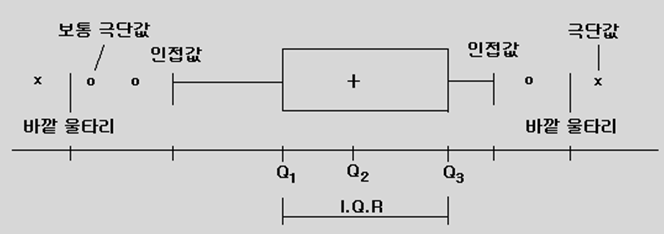

In [ ]:
# quantile 대신 boxplot을 활용한 분위수 확인
plt.boxplot(user_length)
plt.title('Boxplot of user_length')
plt.show

In [ ]:
long_user = user_length[user_length==2314].index[0]
data[data['UserId']==long_user]

In [ ]:
# user_length 기준 하위 99.9%까지의 분포 누적합
length_count = user_length.groupby(user_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]

length_percent_cumsum_999

In [ ]:
# user_length 기준 하위 99.9%까지의 분포 누적합을 시각화
plt.figure(figsize=(20, 10))
plt.bar(x=length_percent_cumsum_999.index,
        height=length_percent_cumsum_999, color='red')
plt.xticks(length_percent_cumsum_999.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size=20)
plt.show()

이 세션정보는 유저를 ID 기반으로 정리할 수 없기 때문에 세션 하나를 유저 하나로 본다면 기존의 유저-상품정보 Matrix보다 훨씬 sparse한 형태가 됩니다.

####  Time

세션 길이가 20이 짧다로 볼 수 있을까? 흠..그렇지 않을거 같습니다. 저 같은 경우 일년에 영화를 20개도 안보기 때문에

In [217]:
import time as tm

data_time = data['Time']
# print(time.gmtime(time[i]))
data_time[0]

978300760

In [218]:
# time[0]/60/60/24/365 # 1초 > 1분 > 1시간 > 1일 > 1년???
tm.gmtime(int(data_time[0]))

time.struct_time(tm_year=2000, tm_mon=12, tm_mday=31, tm_hour=22, tm_min=12, tm_sec=40, tm_wday=6, tm_yday=366, tm_isdst=0)

In [219]:
oldest, latest = data['Time'].min(), data['Time'].max()
print(oldest) 
print(latest)

956703932
1046454590


In [220]:
type(latest)

numpy.int64

In [221]:
import time  as tm

print(tm.gmtime(oldest))
print(tm.gmtime(latest))

time.struct_time(tm_year=2000, tm_mon=4, tm_mday=25, tm_hour=23, tm_min=5, tm_sec=32, tm_wday=1, tm_yday=116, tm_isdst=0)
time.struct_time(tm_year=2003, tm_mon=2, tm_mday=28, tm_hour=17, tm_min=49, tm_sec=50, tm_wday=4, tm_yday=59, tm_isdst=0)


가장 최신의 데이터는 2003년 2월 28일이고, 가장 오래된 데이터는 2000년 4월 25일임을 알 수 있습니다.

### Data Cleansing 

In [222]:
# short_session을 제거한 다음 unpopular item을 제거하면 다시 길이가 1인 session이 생길 수 있습니다.
# 이를 위해 반복문을 통해 지속적으로 제거 합니다.
def cleanse_recursive(data: pd.DataFrame, shortest, least_click) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        data = cleanse_unpopular_item(data, least_click)
        after_len = len(data)
        if before_len == after_len:
            break
    return data


def cleanse_short_session(data: pd.DataFrame, shortest):
    session_len = data.groupby('SessionId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['SessionId'].isin(session_use)]
    return data


def cleanse_unpopular_item(data: pd.DataFrame, least_click):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_click].index
    data = data[data['ItemId'].isin(item_use)]
    return data

In [223]:
# data = cleanse_recursive(data, shortest=2, least_click=5)
data

,UserId,ItemId,Rating,Time
31,1,3186,4,978300019
22,1,1270,5,978300055
27,1,1721,4,978300055
37,1,1022,5,978300055
24,1,2340,3,978300103
...,...,...,...,...
1000019,6040,2917,4,997454429
999988,6040,1921,4,997454464
1000172,6040,1784,3,997454464
1000167,6040,161,3,997454486


해당 데이터는 2003년을 기준으로 최대 3년치에 대한 데이터가 있고, User length는 최소가 20이므로 20개의 순서를 가지는 데이터로 구성된 세션이 있다고 고려되면 됩니다. 이는 영화라는 특성상에서 볼때 충분한 양의 데이터로 판단되므로 ~이상치 제거 없이 바로 진행하겠습니다.~ 

이상치 제거를 안해주면 Time을 기준으로 이후에 split하기 어려워집니다. Session이라는 Dataset으로 간주하고 있으므로 해당 데이터셋을 가장 최근 리뷰를 남긴 영화를 Test set으로 두는게 좋습니다. 그럼, 해당 Test set을 어떤 시간을 기준으로 해야할까요 영화를 어떤 주기로 사용자들이 보는지 살펴볼 필요가 있을거 같습니다. 

**나만의 기준?**
영화 취향은 계절을 기준으로 많이 바뀐다고 생각합니다. 그래서 최근 데이터를 기준으로 2000년 기준으로 했을때 4월이 가장 최근 데이터 이므로 근 4개월에 해당하는 데이터로만 추리고, 2개월, 1개월, 1개월로 data split을 진행하여 영화 예측을 해보겠습니다. 

In [224]:
# struct_time을 asctime으로 변환 
print(tm.asctime(tm.gmtime(data_time[0])).split()[1])
print(tm.asctime(tm.gmtime(data_time[0])).split()[-1])

Dec
2000


In [225]:
# append하는게 좋은 코드는 아니지만 일단 적용 .ㅎㅎ.. 
tmp = []
for i in range(len(data['Time'])):
    tmp.append(tm.asctime(tm.gmtime(data_time[i])).split()[1])
data['Mon'] = tmp

tmp = []
for i in range(len(data['Time'])):
    tmp.append(tm.asctime(tm.gmtime(data_time[i])).split()[-1])
data['Year'] = tmp 

In [226]:
data.head()

,UserId,ItemId,Rating,Time,Mon,Year
31,1,3186,4,978300019,Dec,2000
22,1,1270,5,978300055,Dec,2000
27,1,1721,4,978300055,Dec,2000
37,1,1022,5,978300055,Dec,2000
24,1,2340,3,978300103,Jan,2001


In [227]:
len(data)

1000209

In [228]:
data[(data['Year']=='2002') & (data['Mon']=='Nov')]

,UserId,ItemId,Rating,Time,Mon,Year
23606,169,2372,4,977210582,Nov,2002
28088,195,2539,4,977885999,Nov,2002
27936,195,1603,2,978643703,Nov,2002
28265,195,262,5,979084521,Nov,2002
28418,195,3816,5,993861646,Nov,2002
...,...,...,...,...,...,...
941475,5682,300,4,1026882327,Nov,2002
941578,5682,2995,2,1029466728,Nov,2002
947878,5723,2139,5,1018052588,Nov,2002
969217,5841,2359,5,957821336,Nov,2002


In [229]:
# 2002년 11월부터 2003년 2월로 Filtering

tmp1 = data[(data['Year']=='2002') & (data['Mon']=='Nov')]
tmp2 = data[(data['Year']=='2002') & (data['Mon']=='Dec')]
tmp3 = data[(data['Year']=='2003') & (data['Mon']=='Jan')]
tmp4 = data[(data['Year']=='2003') & (data['Mon']=='Feb')]

data = pd.concat([tmp1,tmp2,tmp3, tmp4])
data.sort_values(['UserId', 'Time'], inplace=True)  # data를 id와 시간 순서로 재정렬해줍니다.

In [252]:
print(len(data[(data['Year']=='2002') & (data['Mon']=='Nov')]))
print(len(data[(data['Year']=='2002') & (data['Mon']=='Dec')]))
print(len(data[(data['Year']=='2003') & (data['Mon']=='Jan')]))
print(len(data[(data['Year']=='2003') & (data['Mon']=='Feb')]))

0
0
0
0


In [230]:
data.head(20)

,UserId,ItemId,Rating,Time,Mon,Year
5030,36,3793,4,978061914,Dec,2002
5077,36,2571,5,978062293,Dec,2002
5022,36,2628,3,978062357,Dec,2002
5028,36,3863,4,978062718,Dec,2002
5247,36,2791,5,978063339,Dec,2002
5087,36,2145,5,978064036,Dec,2002
5273,36,1135,4,978064036,Dec,2002
5103,36,246,5,978103870,Dec,2002
5349,36,1094,4,978210213,Dec,2002
5223,36,3147,5,978211198,Dec,2002


In [231]:
len(data)

6520

In [232]:
# 11, 12, 1, 2
data['Mon'].replace('Nov', 0, inplace=True)
data['Mon'].replace('Dec', 1, inplace=True)
data['Mon'].replace('Jan', 2, inplace=True)
data['Mon'].replace('Feb', 3, inplace=True)
data

,UserId,ItemId,Rating,Time,Mon,Year
5030,36,3793,4,978061914,1,2002
5077,36,2571,5,978062293,1,2002
5022,36,2628,3,978062357,1,2002
5028,36,3863,4,978062718,1,2002
5247,36,2791,5,978063339,1,2002
...,...,...,...,...,...,...
984537,5950,223,3,957444018,3,2003
984750,5950,2243,4,957444036,3,2003
984575,5950,2100,2,957444397,3,2003
984731,5950,3948,4,1046369637,3,2003


### Data split

In [233]:
len(data)

6520

In [242]:
data.groupby('UserId')['Mon'].nunique() == 4

UserId
36      False
59      False
65      False
102     False
131     False
        ...  
5841    False
5878    False
5948    False
5950    False
5996    False
Name: Mon, Length: 278, dtype: bool

In [247]:
data['Mon_sum'] = data.Mon_sum.map(data.groupby(['UserId'])['Mon'].nunique())

In [249]:
data[data['Mon_sum']==6] # 0~3까지의 합이 6이므로 6이 안되면, 각 월 데이터 중 Null이 있는 것 

In [250]:
data

,UserId,ItemId,Rating,Time,Mon,Year,Mon_sum


In [ ]:
# 각 11, 12, 1, 2월의 데이터들을 train, val, test에 넣어준다.
tr = data[(data['Year']=='2002') & (data['Mon']==0)]
tr.append(data[(data['Year']=='2002') & (data['Mon']==1)])

val = data[(data['Year']=='2003') & (data['Mon']==2)]
test = data[(data['Year']=='2004') & (data['Mon']==3)]

## Step 2. 미니 배치의 구성
* user-Parallel Mini-Batch의 개념에 따라, 학습 속도의 저하가 최소화될 수 있도록 구성
* 단, 위 Step 1에서 user 단위를 어떻게 정의했느냐에 따라서 user-Parallel Mini-Batch이 필요할 수 없을 수 있다. 

## Step 3. 모델 구성
* 다양한 하이퍼파라미터를 변경해 보며 검증

## Step 4. 모델 학습
* Recall, MRR 확인

## Step 5. 모델 테스트

### 모델보다는 Set의 문제 - ~기존 Dataset~ => 아래 3가지 한계점을 피해서 구성한 Dataset 활용
1. 시스템이 충분한 정보를 모으지 못 했을 때, 사용자나 아이템에 대한 추론을 할 수 없는 상태인 Cold start
2. 계산량이 너무 많아서 추천의 효율이 떨어지는 상황
3. long tail의 꼬리 부분, 즉 사용자의 관심이 저조한 항목의 정보가 부족하여 추천에서 배제되는 상황